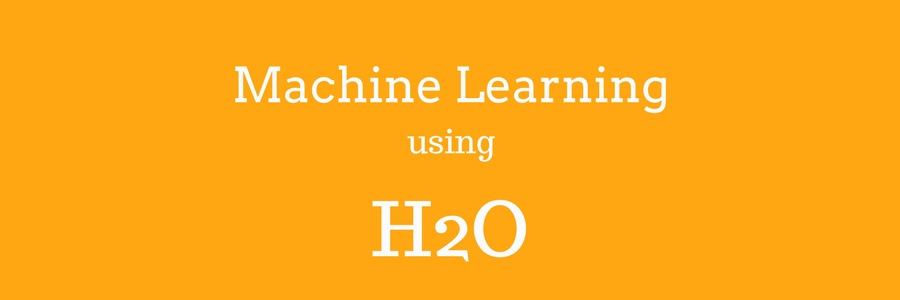

<a id="1.4"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b>  Refrences</b></div>

<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">H20📊Predict🎂🎂Calorie👂 Expenditure💵
 
</h1>  
     
</div>

<p><center style="color:blue; font-family: 'Dancing Script'; font-size:30px;">🙏🏿Thanks for visiting my notebook 🕺🏿</center></p>

In [1]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from itertools import combinations
from scipy.stats import gmean, hmean
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpulz7tx1k
  JVM stdout: /tmp/tmpulz7tx1k/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpulz7tx1k/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,"1 year, 1 month and 18 days"
H2O_cluster_name:,H2O_from_python_unknownUser_jx69vi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Enter the Data world
</h1>  
     
</div>

In [2]:
data_folder = "/kaggle/input/playground-series-s5e5"


In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')


In [4]:
df_train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

<h3 align="center"><font color='black'>💡 Evalaution Metric :</font></h3>
    
    
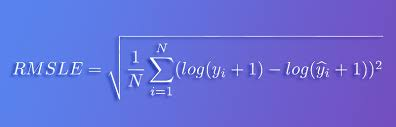
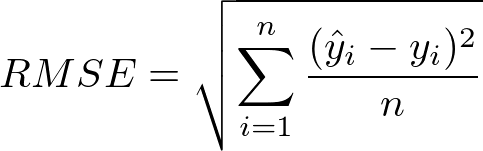
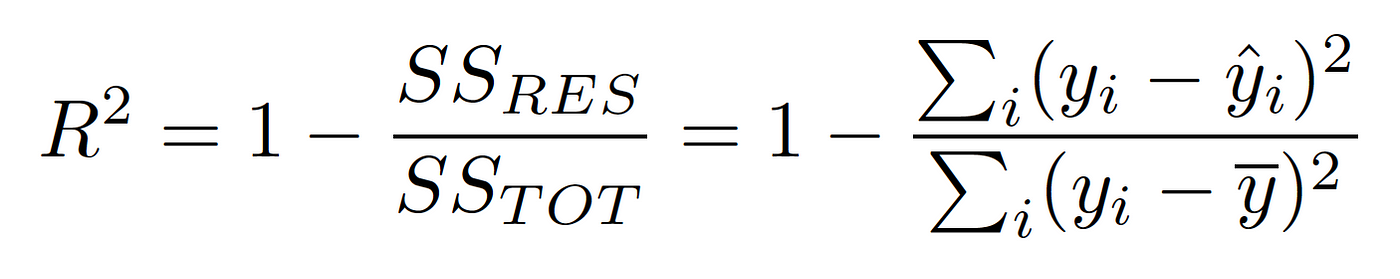

In [5]:
df_train.shape

(750000, 9)

In [6]:
df_train.shape

(750000, 9)

In [7]:
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

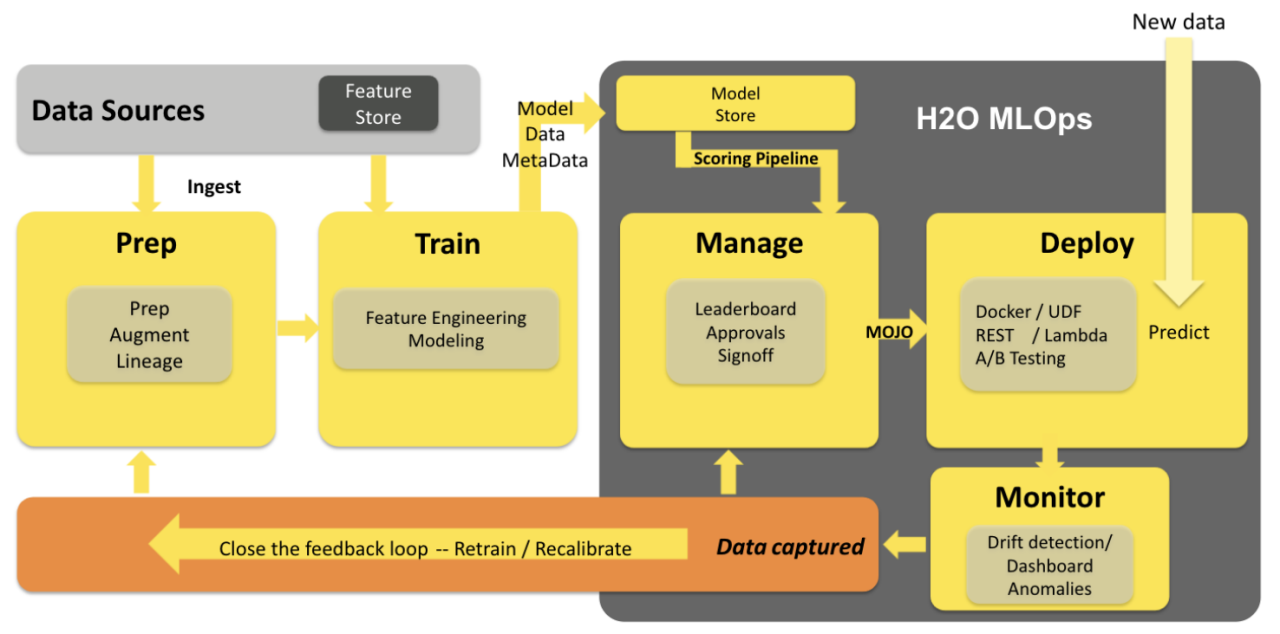

In [8]:
train_data = h2o.H2OFrame(df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
from h2o.frame import H2OFrame
with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = train_data.as_data_frame()

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


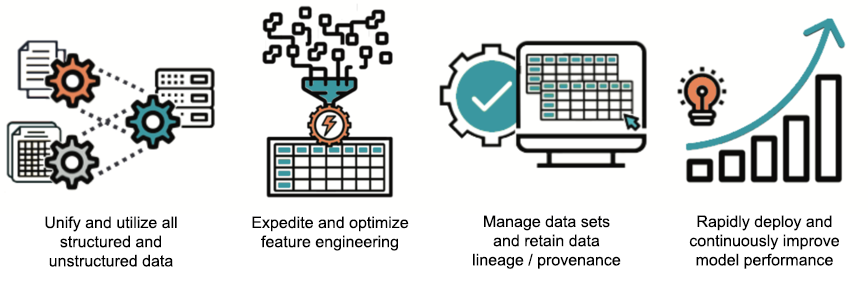

In [10]:
train_data = h2o.H2OFrame(df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
test_data = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Training the Model</h1>  
     
</div>

In [12]:
aml = H2OAutoML(max_runtime_secs=560, seed=42, sort_metric="RMSLE",distribution="AUTO",nfolds=5)


In [13]:
#aml = H2OAutoML(max_runtime_secs=590,seed=42)

#aml = H2OAutoML(max_runtime_secs=3000,nfolds=5,stopping_metric="rmse",
                #sort_metric="rmse",seed=69,max_models=20)
aml.train(y='Calories', training_frame=train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">What Leadboard has to say</h1>  
     
</div>

In [14]:
leaderboard = aml.leaderboard
print(leaderboard)
best_model = aml.leader
print(best_model)

model_id                                                       rmsle      rmse        mse       mae    mean_residual_deviance
StackedEnsemble_BestOfFamily_2_AutoML_1_20250502_134458    0.0677923   3.76531    14.1776   2.29563                   14.1776
StackedEnsemble_AllModels_1_AutoML_1_20250502_134458       0.0692553   3.74731    14.0424   2.27836                   14.0424
GBM_1_AutoML_1_20250502_134458                             0.0815338   3.88527    15.0953   2.43331                   15.0953
DRF_1_AutoML_1_20250502_134458                             0.081639    5.26195    27.6881   3.18721                   27.6881
XGBoost_2_AutoML_1_20250502_134458                         0.211459   20.9294    438.04    15.303                    438.04
GBM_2_AutoML_1_20250502_134458                             0.632968   27.5226    757.494   22.2992                   757.494
GBM_3_AutoML_1_20250502_134458                             0.697818   32.0005   1024.03    26.3354                  1024.

In [15]:
df_test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
predictions = best_model.predict(df_test)
predictions_df = predictions.as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/opt/conda/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


# <span style="color:#E888BB; font-size: 1%;">1 | DATA CLEANSING AND DATA PREP</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/532173/pexels-photo-532173.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Final Submission </span></b> </div>

In [17]:
df_sub = pd.read_csv('/kaggle/input/playground-series-s5e5/sample_submission.csv')

In [18]:
predictions_df

,predict
0,27.729591
1,108.199248
2,87.050154
3,128.395967
4,75.906425
...,...
249995,25.843397
249996,8.704799
249997,73.168840
249998,170.314849


In [19]:
df_sub.head()

,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283


In [20]:
df_sub['Calories'] =(predictions_df['predict'].values)

In [21]:
df_sub.to_csv('submission.csv', index=False)

<Axes: >

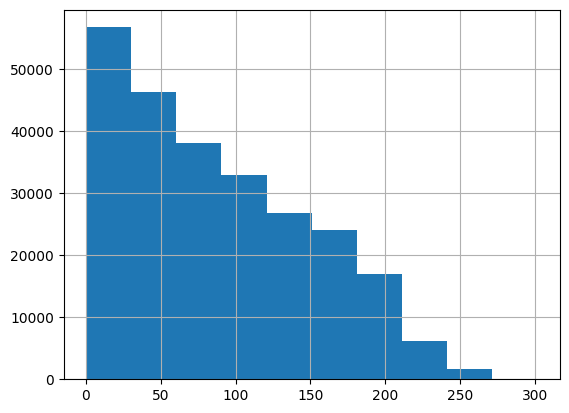

In [22]:
df_sub['Calories'].hist()

<a id="1.4"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b>  Refrences</b></div>

# Refrences https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html


<div style="background-color: black; padding: 20px; border-radius: 10px; margin: 20px auto; max-width: 600px;">
    <center>
        <div style="background-color: white; padding: 20px; border-radius: 10px;">
            <b style="font-size: 24px; color: #ff6600;">👏😊 &nbsp; IF YOU FIND THIS HELPFUL, PLEASE UPVOTE! &nbsp; 💢👏</b>
            <div style="margin-top: 20px; font-size: 18px; color: black;">
                🥽🖥This took quite a bit of effort on my part, and while it might seem trivial, 🏆🏆receiving your appreciation means a lot to me! 😅🎃 Your upvotes inspire me to keep creating helpful content like this🖥🍱.                    
            </div>
        </div>
    </center>
</div>